In [1]:
import pandas as pd

In [23]:
df = pd.read_csv(r'/Users/yugandharravipati/Documents/Data Analytics/IEA Global EV Data 2024.csv')

print(df.columns)

print(df.head())

print(df.describe())

print(df.isnull().sum())

    id     region       parameter  mode powertrain    year      unit  \
0  1.0  Australia  EV stock share  Cars         EV  2011.0   percent   
1  2.0  Australia  EV sales share  Cars         EV  2011.0   percent   
2  3.0  Australia        EV sales  Cars        BEV  2011.0  Vehicles   
3  4.0  Australia        EV stock  Cars        BEV  2011.0  Vehicles   
4  5.0  Australia        EV stock  Cars        BEV  2012.0  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  
                 id          year         value
count  12586.000000  12586.000000  1.258600e+04
mean    6325.916653   2019.855236  4.296832e+05
std     3655.654557      5.468719  6.878936e+06
min        1.000000   2010.000000  1.100000e-04
25%     3158.250000   2016.000000  2.300000e+00
50%     6327.500000   2020.000000  1.400000e+02
75%     9495.750000   2022.000000  5.600000e+03
max    12653.000000   2035.000000  4.400000e+08
id            67
region        67
parameter  

In [25]:
# Data Cleaning

In [27]:
df.fillna(0, inplace=True)

# Exploratory Data Analysis (EDA)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Top 5 countries with EV sales

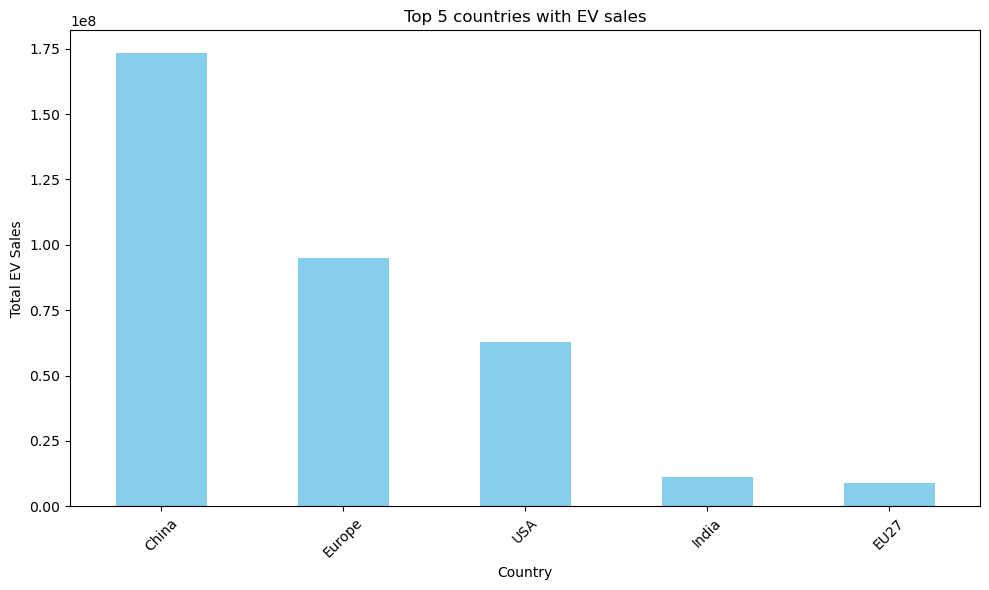

In [126]:
df1 = df[(df['region'] != 'World') & (df['region'] != 'Rest of the world')]
ev_sales_country = df1[df1['parameter'] == 'EV sales'].groupby('region')['value'].sum().sort_values(ascending=False)

plt.figure(figsize = (10,6))
ev_sales_country.head().plot(kind='bar', color='skyblue')
plt.title('Top 5 countries with EV sales')
plt.xlabel('Country')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
# Average EV Market Share per Year


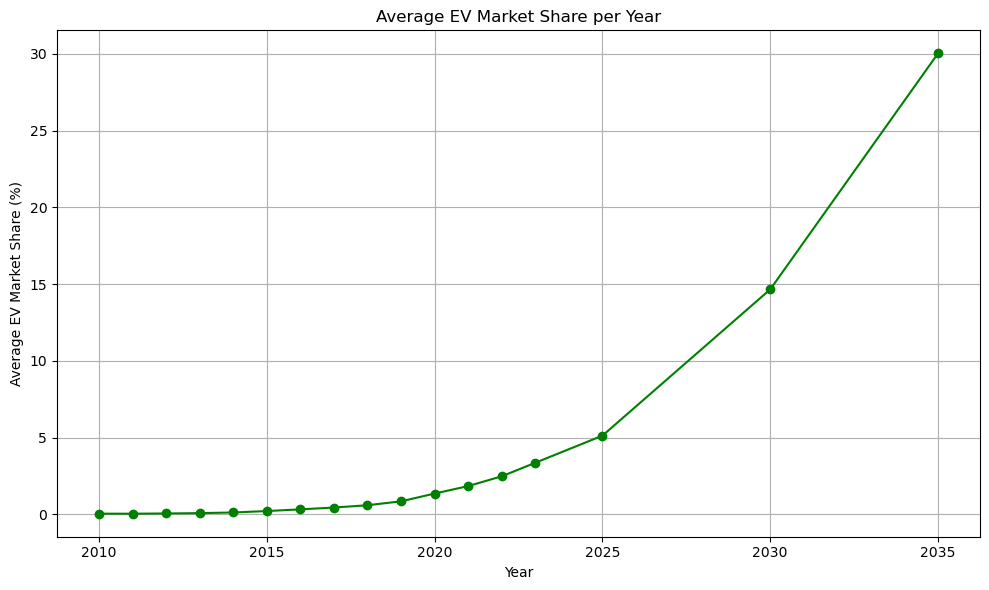

In [122]:
ev_market_share_year = df1[df1['parameter'] == 'EV stock share'].groupby('year')['value'].mean()

plt.figure(figsize=(10, 6))
ev_market_share_year.plot(kind='line', marker='o', color='green')
plt.title('Average EV Market Share per Year')
plt.xlabel('Year')
plt.ylabel('Average EV Market Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Top 5 Countries with Highest EV Market Share in 2023

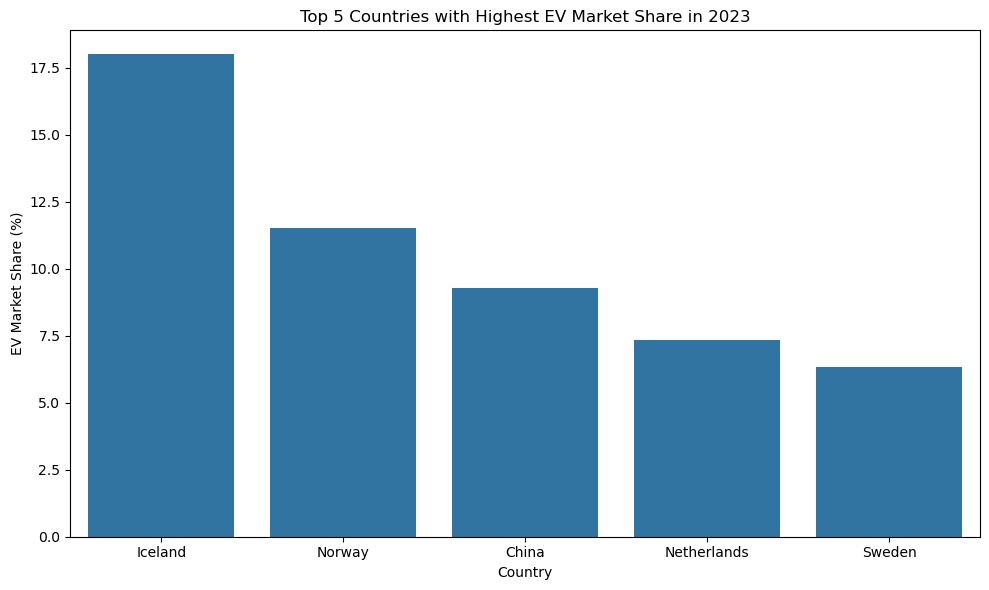

In [174]:
df_2023 = df1[df1['year'] == 2023]
market_share_2023 = df_2023[df_2023['parameter'] == 'EV stock share'].groupby('region')['value'].mean()
top_countries = market_share_2023.sort_values(ascending = False).head()
type(top_countries)

top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['region', 'average_value'] 


plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='average_value', data=top_countries_df)
plt.title('Top 5 Countries with Highest EV Market Share in 2023')
plt.xlabel('Country')
plt.ylabel('EV Market Share (%)')
plt.tight_layout()
plt.show()


In [190]:
# Yearly Growth of EV Stock in China

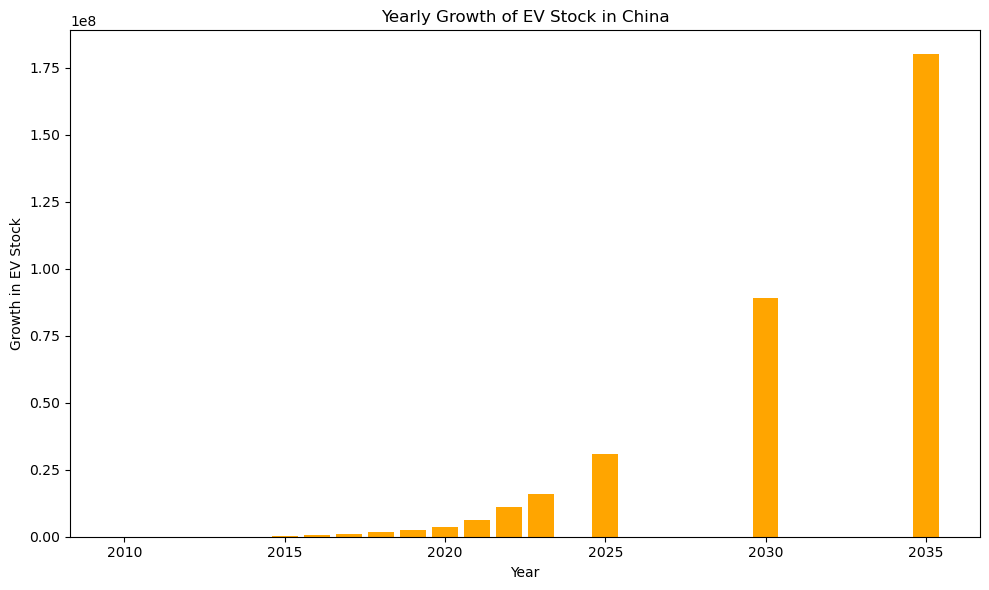

In [220]:
china_data = df1[df1['region'] == 'China'].copy()
china_data['Growth'] = china_data[china_data['parameter'] == 'EV stock']['value']


plt.figure(figsize=(10, 6))
plt.bar(china_data['year'], china_data['Growth'], color='orange')
plt.title('Yearly Growth of EV Stock in China')
plt.xlabel('Year')
plt.ylabel('Growth in EV Stock')
plt.tight_layout()
plt.show()